# Leisure activities offer in Catalonia

In [99]:
#LOAD DATA SET

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("3b2j-rg3e", limit=50697) #50697

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
print(df.columns.tolist())
#df = df[["any","comarca","tipus_d_activitat","poca","dies_de_durada","total_participants","total_assistents","total_dirigents","nombre_dirigents_titulats"]]
df

['any', 'nom_de_l_entitat_organitzadora', 'poblaci_de_l_entitat_organitzadora', 'comarca_de_l_entitat_organitzadora', 'vinculaci_de_l_entitat_organitzadora', 'nom_de_l_entitat_promotora', 'poblaci', 'comarca', 'tipus_d_activitat', 'data_d_inici', 'data_de_finalitzaci', 'dies_de_durada', 'poca', 'ritme_de_funcionament_del_casal', 'casal_ofereix_dinar', 'lloc_on_es_fa_l_activitat', 'poblaci_on_s_inicia_l_activitat', 'comarca_on_s_inicia_l_activitat', 'municipi_on_finalitza_l_activitat_per_a_rutes', 'comarca_on_finalitza_l_activitat_per_a_rutes', 'nombre_nens_menors_3_anys', 'nombre_nenes_menors_3_anys', 'nombre_nens_entre_3_i_5', 'nombre_nenes_entre_3_i_5', 'nombre_nois_entre_6_i_9', 'nombre_noies_entre_6_i_9', 'nombre_nois_entre_10_i_12', 'nombre_noies_entre_9_i_12', 'nombre_nois_entre_13_i_15', 'nombre_noies_entre_13_i_15', 'nombre_nois_entre_16_i_17', 'nombre_noies_entre_16_i_17', 'nombre_nois_majors_18', 'nombre_noies_majors_18', 'edat_m_nima_participants', 'edat_m_xima_participants'

,any,nom_de_l_entitat_organitzadora,poblaci_de_l_entitat_organitzadora,comarca_de_l_entitat_organitzadora,vinculaci_de_l_entitat_organitzadora,nom_de_l_entitat_promotora,poblaci,comarca,tipus_d_activitat,data_d_inici,...,total_dirigents,nombre_dirigents_titulats,edat_m_nima_dirigents,edat_m_xima_dirigents,total_assistents,nombre_homes_personal_suport,nombre_dones_personal_suport,total_de_personal_de_suport,edat_m_nima_personal_de_suport,edat_m_xima_de_personal_de_suport
0,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,ACAMPADA,25/06/2017,...,5,2,19,20,29,NaN,NaN,NaN,NaN,NaN
1,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,ACAMPADA,28/06/2017,...,5,2,19,20,29,NaN,NaN,NaN,NaN,NaN
2,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,ACAMPADA,03/08/2017,...,3,2,19,21,17,NaN,NaN,NaN,NaN,NaN
3,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,Agència Catalana de la Joventut,BARCELONA,Barcelonès,CAMP DE TREBALL,16/08/2017,...,5,3,19,26,29,NaN,NaN,NaN,NaN,NaN
4,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,Agència Catalana de la Joventut,BARCELONA,Barcelonès,ACAMPADA,21/08/2017,...,5,3,19,26,29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50692,2021,ZIGAZAGA S.L.,CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,AFA EL TIMBAL,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,5,3,27,38,32,0,0,0,0,0
50693,2021,"ZIGA-ZAGA, S.L.",CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,AFA EL TIMBAL,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,4,2,27,38,30,0,0,0,0,0
50694,2021,"ZIGA-ZAGA, S.L.",CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,EBM MONT TÀBER,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,4,1,25,36,31,0,0,0,0,0
50695,2021,"ZIGA-ZAGA, S.L.",CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,AMPA GUINBÓ,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,4,1,25,51,34,0,0,0,0,0


In [100]:
# MAKING "HIVERN 1" AND "HIVERN 2" THE SAME "poca" (època) EQUAL TO "HIVERN"
for i in range(len(df["poca"])):
    if df["poca"][i] == "HIVERN 1" or df["poca"][i] == "HIVERN 2":
        df["poca"][i] = "HIVERN"
print(len(df["poca"]))
df["poca"].value_counts()/df["poca"].value_counts().sum()

50697


ESTIU        0.897686
PRIMAVERA    0.062785
HIVERN       0.037556
TARDOR       0.001973
Name: poca, dtype: float64

In [101]:
# ADDING A "prov_ncia" (província) COLUMN TO THE DATA SET
df2 = pd.DataFrame()
for i in range(len(df)):
    if df["comarca"][i] in ["Barcelonès","Vallès Occidental","Baix Llobregat",
                            "Maresme","Vallès Oriental","Bages","Anoia", "Garraf",
                            "Osona","Alt Penedès","Berguedà","Moianès"]:
        df2 = pd.concat([df2,
           pd.DataFrame({"prov_ncia":["Barcelona"]})],ignore_index=True)
        
    if df["comarca"][i] in ["Segrià","Alt Urgell","Noguera","Montsià",
                           "Pallars Jussà","Pallars Sobirà","Urgell","Pla d'Urgell",
                           "Segarra","Solsonès","Garrigues","Vall d'Aran","Alta Ribagorça"]:
        df2 = pd.concat([df2,
           pd.DataFrame({"prov_ncia":["Lleida"]})],ignore_index=True)

    if df["comarca"][i] in ["Gironès", "La Selva","Alt Empordà","Baix Empordà",
                            "Pla de l'Estany","Garrotxa","Ripollès","Cerdenya"]:
        df2 = pd.concat([df2,
           pd.DataFrame({"prov_ncia":["Girona"]})],ignore_index=True)
    
    if df["comarca"][i] in ["Tarragonès","Garraf","Baix Camp","Baix Ebre",
                           "Alt Camp","Baix Penedès","Terra Alta","Conca de Barbera",
                           "Ribera d'Ebra","Priorat"]:
        df2 = pd.concat([df2,
           pd.DataFrame({"prov_ncia":["Tarragona"]})],ignore_index=True)

df['prov_ncia'] = df2
df

,any,nom_de_l_entitat_organitzadora,poblaci_de_l_entitat_organitzadora,comarca_de_l_entitat_organitzadora,vinculaci_de_l_entitat_organitzadora,nom_de_l_entitat_promotora,poblaci,comarca,tipus_d_activitat,data_d_inici,...,nombre_dirigents_titulats,edat_m_nima_dirigents,edat_m_xima_dirigents,total_assistents,nombre_homes_personal_suport,nombre_dones_personal_suport,total_de_personal_de_suport,edat_m_nima_personal_de_suport,edat_m_xima_de_personal_de_suport,prov_ncia
0,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,ACAMPADA,25/06/2017,...,2,19,20,29,NaN,NaN,NaN,NaN,NaN,Girona
1,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,ACAMPADA,28/06/2017,...,2,19,20,29,NaN,NaN,NaN,NaN,NaN,Girona
2,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,ACAMPADA,03/08/2017,...,2,19,21,17,NaN,NaN,NaN,NaN,NaN,Girona
3,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,Agència Catalana de la Joventut,BARCELONA,Barcelonès,CAMP DE TREBALL,16/08/2017,...,3,19,26,29,NaN,NaN,NaN,NaN,NaN,Barcelona
4,2017,(IAEDEN) INSTITUCIÓ ALTEMPORDANESA PER A LA DE...,FIGUERES,Alt Empordà,No escau,Agència Catalana de la Joventut,BARCELONA,Barcelonès,ACAMPADA,21/08/2017,...,3,19,26,29,NaN,NaN,NaN,NaN,NaN,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50692,2021,ZIGAZAGA S.L.,CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,AFA EL TIMBAL,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,3,27,38,32,0,0,0,0,0,NaN
50693,2021,"ZIGA-ZAGA, S.L.",CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,AFA EL TIMBAL,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,2,27,38,30,0,0,0,0,0,NaN
50694,2021,"ZIGA-ZAGA, S.L.",CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,EBM MONT TÀBER,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,1,25,36,31,0,0,0,0,0,NaN
50695,2021,"ZIGA-ZAGA, S.L.",CORNELLÀ DE LLOBREGAT,Baix Llobregat,No escau,AMPA GUINBÓ,BARCELONA,Barcelonès,CASAL VACANCES,16/07/2021,...,1,25,51,34,0,0,0,0,0,NaN


In [102]:
# REASSIGNING SOME ACTIVITIES IGNOING OVERNIGHT STAY
for i in range(len(df["tipus_d_activitat"])):
    if df["tipus_d_activitat"][i] == "CASAL ESPORTIU (sense pernoctació)" or df["tipus_d_activitat"][i] == "ESTADA O CAMPUS ESPORTIU (amb pernoctació)":
        df["tipus_d_activitat"][i] = "CASAL ESPORTIU"
    if df["tipus_d_activitat"][i] == "RUTA ESPORTIVA":
        df["tipus_d_activitat"][i] = "RUTA"
    if df["tipus_d_activitat"][i] == "ESTADA O CAMPUS ESPORTIU":
        df["tipus_d_activitat"][i] = "CASAL ESPORTIU"
        

In [103]:
# DATA FRAME FOR EACH "prov_ncia" (província) REGION
bcn = pd.DataFrame()
gir = pd.DataFrame()
tgn = pd.DataFrame()
lda = pd.DataFrame()

for i in range(len(df["prov_ncia"])):
    if df["prov_ncia"][i] == "Barcelona":
        bcn = pd.concat([bcn,pd.DataFrame({"tipus_d_activitat":[df["tipus_d_activitat"][i]]})],ignore_index=True)
    if df["prov_ncia"][i] == "Girona":
        gir = pd.concat([gir,pd.DataFrame({"tipus_d_activitat":[df["tipus_d_activitat"][i]]})],ignore_index=True)
    if df["prov_ncia"][i] == "Lleida":
        lda = pd.concat([lda,pd.DataFrame({"tipus_d_activitat":[df["tipus_d_activitat"][i]]})],ignore_index=True)
    if df["prov_ncia"][i] == "Tarragona":
        tgn = pd.concat([tgn,pd.DataFrame({"tipus_d_activitat":[df["tipus_d_activitat"][i]]})],ignore_index=True)

In [104]:
print(bcn["tipus_d_activitat"].value_counts())

CASAL VACANCES     17418
CASAL ESPORTIU      6566
COLÒNIA             4937
ACAMPADA            3755
RUTA                2197
CAMP DE TREBALL      499
Name: tipus_d_activitat, dtype: int64


In [105]:
print(gir["tipus_d_activitat"].value_counts())

CASAL VACANCES     2958
CASAL ESPORTIU     1002
COLÒNIA             635
ACAMPADA            454
RUTA                288
CAMP DE TREBALL      56
Name: tipus_d_activitat, dtype: int64


In [106]:
print(tgn["tipus_d_activitat"].value_counts())

CASAL VACANCES     2323
CASAL ESPORTIU      900
COLÒNIA             556
ACAMPADA            312
RUTA                163
CAMP DE TREBALL      60
Name: tipus_d_activitat, dtype: int64


In [107]:
print(lda["tipus_d_activitat"].value_counts())

CASAL VACANCES     2770
CASAL ESPORTIU      877
COLÒNIA             510
ACAMPADA            418
RUTA                224
CAMP DE TREBALL      61
Name: tipus_d_activitat, dtype: int64


In [108]:
# CALCULATE PERCENTILE OF TOTAL ACTIVITIES OFERED PER REGION
num_act = [bcn["tipus_d_activitat"].value_counts().sum(),gir["tipus_d_activitat"].value_counts().sum(),
          tgn["tipus_d_activitat"].value_counts().sum(),lda["tipus_d_activitat"].value_counts().sum()]
s = sum(num_act)
print("BCN =",round(num_act[0]/s,2),"GIR =",round(num_act[1]/s,2),"TGN =",round(num_act[2]/s-0.006,2),"LDA =",round(num_act[3]/s,2))

BCN = 0.71 GIR = 0.11 TGN = 0.08 LDA = 0.1


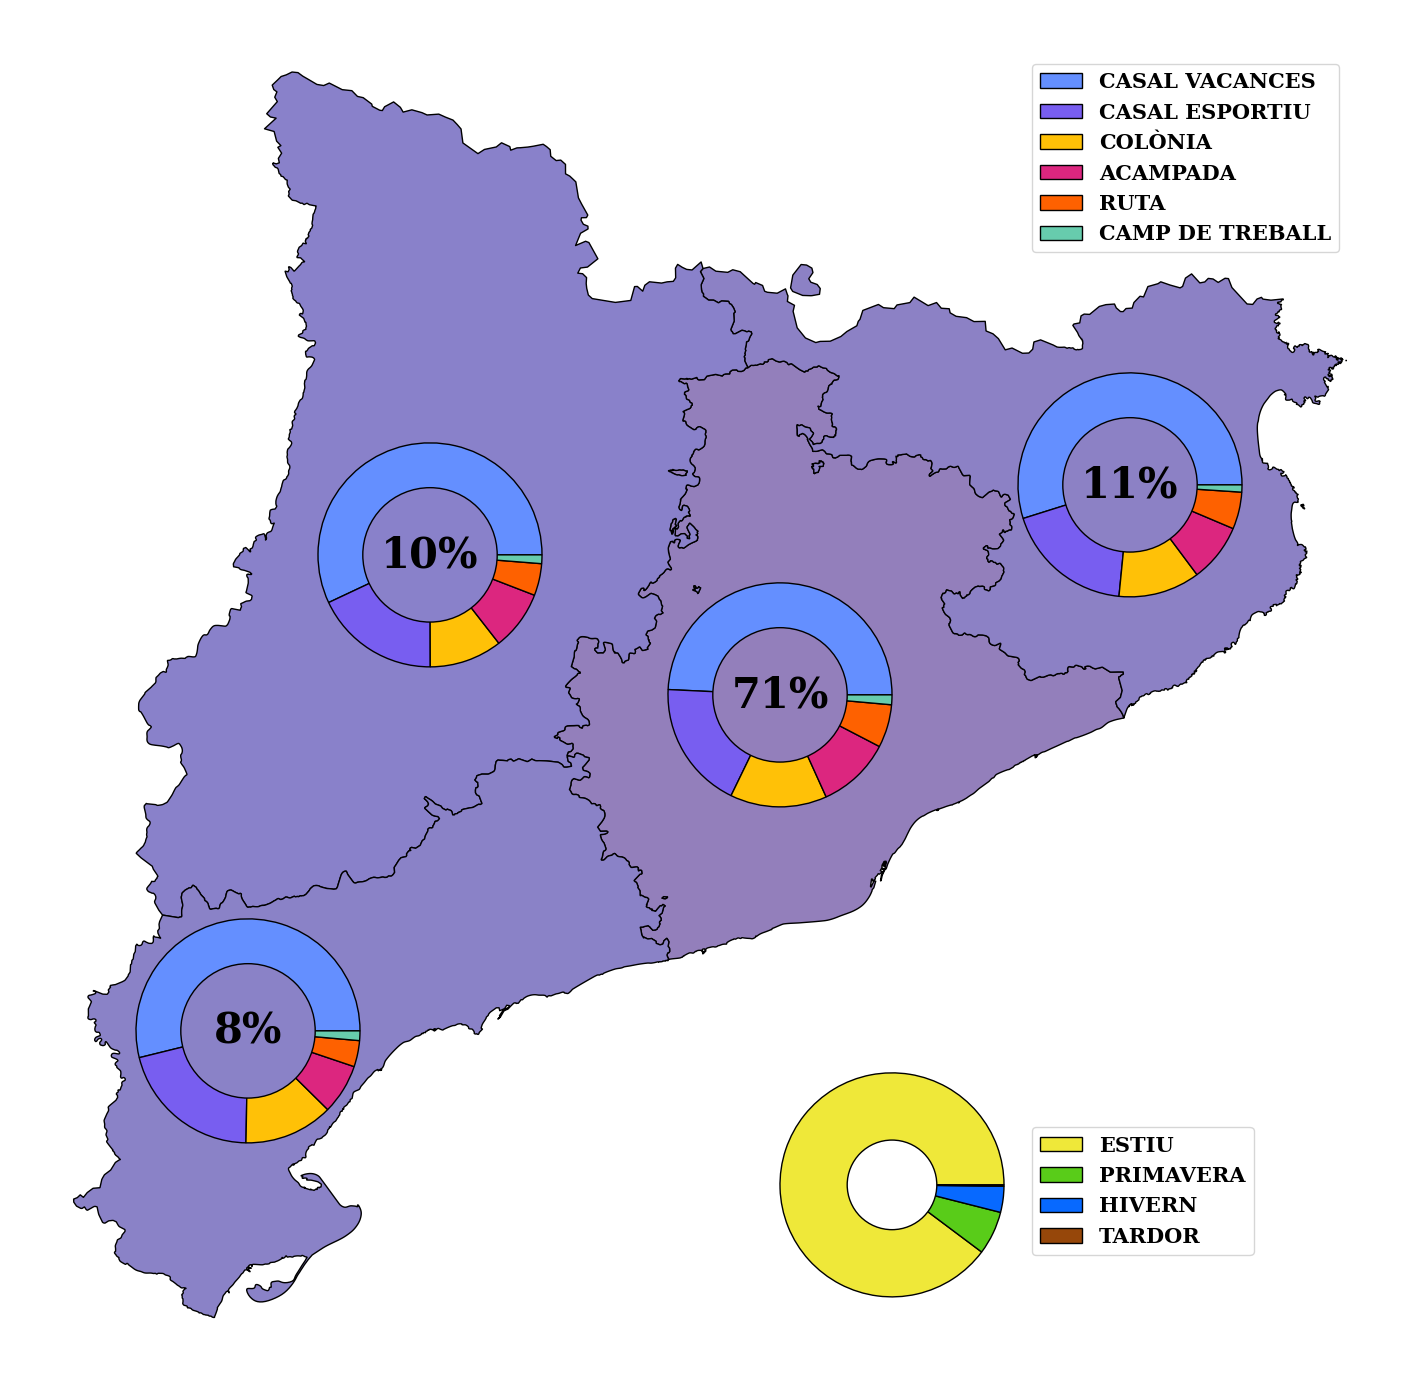

In [109]:
# GRAPH CONSTRUCTION
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
# SELECT FONT AND SIZE
font = {"font.family" : "serif", 
        "mathtext.fontset" : "stix",
        "font.size": 15,
        "font.weight":"bold"}
plt.rcParams.update(font)
# COLORS SELECTED CONSIDERING COLORBLIND PEOPLE
colors_map = [ "648FFF", '785EF0', 'FFC107', 'DC267F', 'FE6100', '67CCAD', '423008', '999999', 'e41a1c', 'dede00']
clr = [ "#648FFF", '#785EF0', '#FFC107', '#DC267F', '#FE6100', '#67CCAD', '#423008', '#999999', '#e41a1c', '#dede00']

# CALCULATE COLORS PROPORTIONS
lda_port = lda["tipus_d_activitat"].value_counts()/lda["tipus_d_activitat"].value_counts().sum()
bcn_port = bcn["tipus_d_activitat"].value_counts()/bcn["tipus_d_activitat"].value_counts().sum()
gir_port = gir["tipus_d_activitat"].value_counts()/gir["tipus_d_activitat"].value_counts().sum()
tgn_port = tgn["tipus_d_activitat"].value_counts()/tgn["tipus_d_activitat"].value_counts().sum()

# CREATE COLOR PROPORTION DICTIONARY
lda_color = {}
for i, port in enumerate(lda_port):
    lda_color.update({colors_map[i]: port})
    
bcn_color = {}
for i, port in enumerate(bcn_port):
    bcn_color.update({colors_map[i]: port})
    
tgn_color = {}
for i, port in enumerate(tgn_port):
    tgn_color.update({colors_map[i]: port})
    
gir_color = {}
for i, port in enumerate(gir_port):
    gir_color.update({colors_map[i]: port})

def combine_hex_values(d):
    d_items = sorted(d.items())
    tot_weight = sum(d.values())
    red = int(sum([int(k[:2], 16)*v for k, v in d_items])/tot_weight)
    green = int(sum([int(k[2:4], 16)*v for k, v in d_items])/tot_weight)
    blue = int(sum([int(k[4:6], 16)*v for k, v in d_items])/tot_weight)
    zpad = lambda x: x if len(x)==2 else '0' + x
    return zpad(hex(red)[2:]) + zpad(hex(green)[2:]) + zpad(hex(blue)[2:])

#GENERATE COLOR REGION
lda_color = f"#{combine_hex_values(lda_color)}"
bcn_color = f"#{combine_hex_values(bcn_color)}"
tgn_color = f"#{combine_hex_values(tgn_color)}"
gir_color = f"#{combine_hex_values(gir_color)}"

figure = plt.figure(figsize=(14,14))
# GENERAL AXIS
ax = figure.add_axes([0, 0, 1, 1])
ax.axis('off')
# SEASON PIE
axx = figure.add_axes([0.53, 0.05, 0.2, 0.2])
df["poca"].value_counts().plot(ax=axx,labels=lab,colors=["#EFE839","#59CC19","#0769FF","#96470A"],kind='pie',
                            wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid'})
axx.set_ylabel('')
my_circle=plt.Circle((0,0), radius=0.4, edgecolor="black",facecolor="white",linewidth=1,zorder=10)
axx.add_artist(my_circle)
axx.legend(labels=["ESTIU","PRIMAVERA","HIVERN","TARDOR"], loc=(1,0.25))

# PRINT MULTYPOLIGONS WITH ITS CORESPONDING COLOR
spain = gpd.read_file("shape/BCN500_0101S_LIMITE_ADM.shp", crs="EPSG:4326") 
catalunya  = spain[spain["CCAA"].isin(['Cataluña'])]

barcelona = catalunya[catalunya["ETIQUETA"].isin(['Barcelona'])]
girona = catalunya[catalunya["ETIQUETA"].isin(['Girona'])]
lleida = catalunya[catalunya["ETIQUETA"].isin(['Lleida'])]
tarragona = catalunya[catalunya["ETIQUETA"].isin(['Tarragona'])]

barcelona.plot(ax=ax,edgecolor = "black",linewidth=1, color=bcn_color)
girona.plot(ax=ax,edgecolor = "black",linewidth=1, color=gir_color)
lleida.plot(ax=ax,edgecolor = "black",linewidth=1, color=lda_color)
tarragona.plot(ax=ax,edgecolor = "black",linewidth=1, color=tgn_color)

ax3 = figure.add_axes([0.45, 0.4, 0.2, 0.2]) #barcelona
ax4 = figure.add_axes([0.7, 0.55, 0.2, 0.2]) #girona
ax2 = figure.add_axes([0.2, 0.5, 0.2, 0.2]) #lleida
ax5 = figure.add_axes([0.07, 0.16, 0.2, 0.2]) #tarragona

lab = [" "," "," "," "," "," "," "]

# PRINT ACTIVITIES PIE FOR EACH REGION

lda["tipus_d_activitat"].value_counts().plot(ax=ax2,labels=lab,colors=clr,kind='pie',
                                            wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid'})
my_circle=plt.Circle((0,0), radius=0.6, edgecolor="black",facecolor=lda_color,linewidth=1,zorder=10)
ax2.add_artist(my_circle)
ax2.text(0, 0, "10%",ha="center", va="center",size=30,zorder=20)

ax2.set_ylabel('')

bcn["tipus_d_activitat"].value_counts().plot(ax=ax3,labels=lab,colors=clr,kind='pie',
                                            wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid'})
my_circle=plt.Circle((0,0), radius=0.6, edgecolor="black",facecolor=bcn_color,linewidth=1,zorder=10)
ax3.add_artist(my_circle)
ax3.text(0, 0, "71%",ha="center", va="center",size=30,zorder=20)
ax3.set_ylabel('')
# SET GENERAL LEGEND
ax3.legend(labels=["CASAL VACANCES","CASAL ESPORTIU","COLÒNIA","ACAMPADA",
                  "RUTA","CAMP DE TREBALL" ], loc=(1.4, 2.08))

gir["tipus_d_activitat"].value_counts().plot(ax=ax4,labels=lab,colors=clr,kind='pie',
                                            wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid'})
my_circle=plt.Circle((0,0), radius=0.6, edgecolor="black",facecolor=gir_color,linewidth=1,zorder=10)
ax4.add_artist(my_circle)
ax4.text(0, 0, "11%",ha="center", va="center",size=30,zorder=20)

ax4.set_ylabel('')

tgn["tipus_d_activitat"].value_counts().plot(ax=ax5,labels=lab,colors=clr,kind='pie',
                                            wedgeprops={"edgecolor":"black",'linewidth': 1, 'linestyle': 'solid'})
my_circle=plt.Circle((0,0), radius=0.6, edgecolor="black",facecolor=tgn_color,linewidth=1,zorder=10)
ax5.add_artist(my_circle)
ax5.text(0, 0, "8%",ha="center", va="center",size=30,zorder=20)

ax5.set_ylabel('')

plt.savefig("figure.pdf")
plt.show()